# ***## Analysis and predection of heart disease on the basis of chest pain and heart beats per minute using ML classification algo***

## Importing the Library

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

In [11]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [14]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [15]:
df.target.unique()

array([1, 0])

## Data VIZ

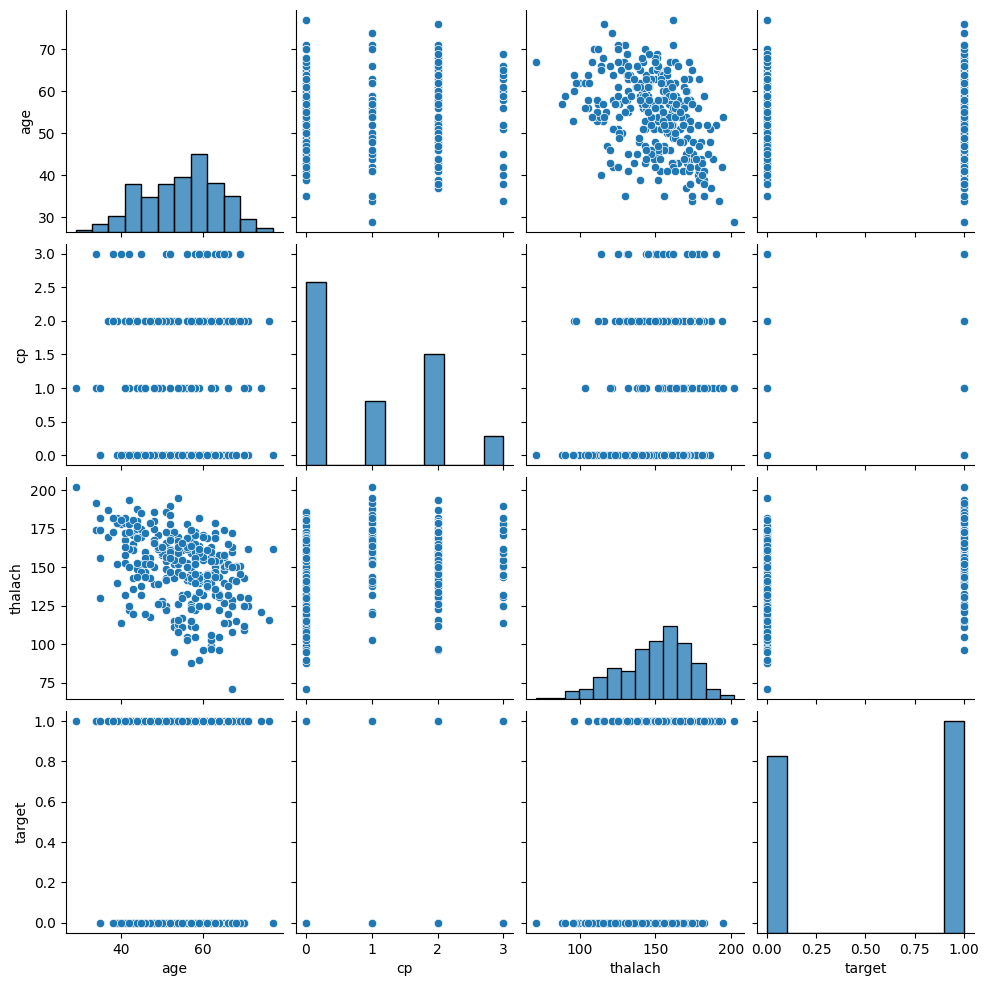

In [16]:
sns.pairplot(df[['age','cp','thalach','target']])

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

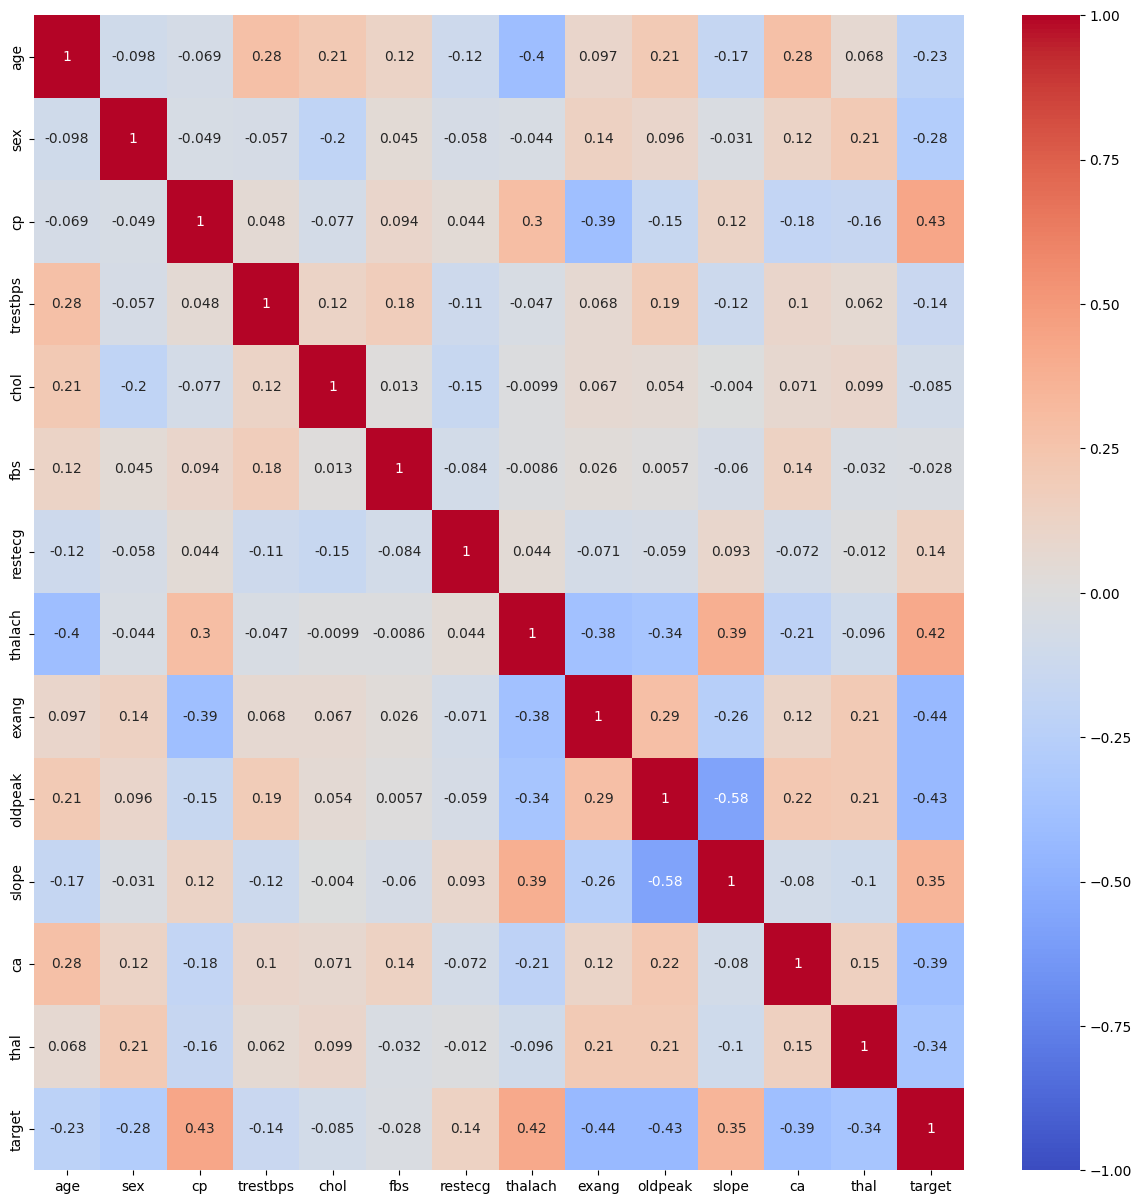

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',vmin=-1,vmax=1)

## Features and Target

In [19]:
X = df[['age','cp','thalach']]
Y=df['target']
X,Y

(     age  cp  thalach
 0     63   3      150
 1     37   2      187
 2     41   1      172
 3     56   1      178
 4     57   0      163
 ..   ...  ..      ...
 298   57   0      123
 299   45   3      132
 300   68   0      141
 301   57   0      115
 302   57   1      174
 
 [303 rows x 3 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model=LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
model.fit(X_train,Y_train)

LogisticRegression()

In [21]:
ytrain_pred=model.predict(X_train)
ytest_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)[:1]
y_proba

array([[0.74451929, 0.25548071]])

## Accu for train and Test

In [22]:
print(f"Accuracy Train Data: {accuracy_score(Y_train,ytrain_pred):.2f}")
print(f"Accuracy Test Data: {accuracy_score(Y_test,ytest_pred):.2f}")

Accuracy Train Data: 0.79
Accuracy Test Data: 0.67


## Confusion Matrix

In [23]:
print(f"Confussion Matrix Training Data:\n {confusion_matrix(Y_train,ytrain_pred)}")
print(f"Confussion Matrix Testing Data:\n {confusion_matrix(Y_test,ytest_pred)}")

Confussion Matrix Training Data:
 [[ 83  25]
 [ 27 107]]
Confussion Matrix Testing Data:
 [[19 11]
 [ 9 22]]


In [24]:
model.score(X_train, Y_train)

0.7851239669421488

In [25]:
def predict_heart_disease():
    age = int(input("Enter your age: "))
    cp = int(input("Enter your chest pain type (0-3): "))
    thalach = int(input("Enter your maximum heart rate achieved: "))

    user_data = np.array([[age, cp, thalach]])
    prediction = model.predict(user_data)

    result = "You have heart disease." if prediction[0] == 1 else "You don't have heart disease."
    print(result)


predict_heart_disease()

Enter your age: 23
Enter your chest pain type (0-3): 2
Enter your maximum heart rate achieved: 34
You don't have heart disease.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Model Saving

In [26]:
import joblib
joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

## Model Deployment

In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
df = pd.read_csv('heart.csv')
df.head()
x = df[['age','cp','thalach']]
Y =df['target']
model=LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
model.fit(X_train,Y_train)
ytrain_pred=model.predict(X_train)
ytest_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)[:1]
y_proba
def predict_heart_disease():
    age = int(input("Enter your age: "))
    cp = int(input("Enter your chest pain type (0-3): "))
    thalach = int(input("Enter your maximum heart rate achieved: "))

    user_data = np.array([[age, cp, thalach]])
    prediction = model.predict(user_data)

    result = "You have heart disease." if prediction[0] == 1 else "You don't have heart disease."
    print(result)


predict_heart_disease()

Enter your age: 34
Enter your chest pain type (0-3): 3
Enter your maximum heart rate achieved: 455
You have heart disease.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
